## Fashion MNIST 

## Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
data = pd.read_csv("Data/fashion-mnist_train.csv")

In [3]:
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


The training dataset has 60000 rows and 785 columns (first column is label and others are pixels)

In [5]:
print("Class distribution:")
label_counts = data["label"].value_counts().sort_index()
print(label_counts)

Class distribution:
label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64


The training dataset has 10 labels (T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag and Ankle Boot respectively) and each label has 6000 each and so the dataset is balanced.

In [6]:
data.isnull().sum() # no null values

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

### Visualization

In [7]:
# Splitting the dataset into features and labels
X = data.drop("label", axis=1).values
y = data["label"].values

In [8]:
X.shape

(60000, 784)

In [9]:
y.shape

(60000,)

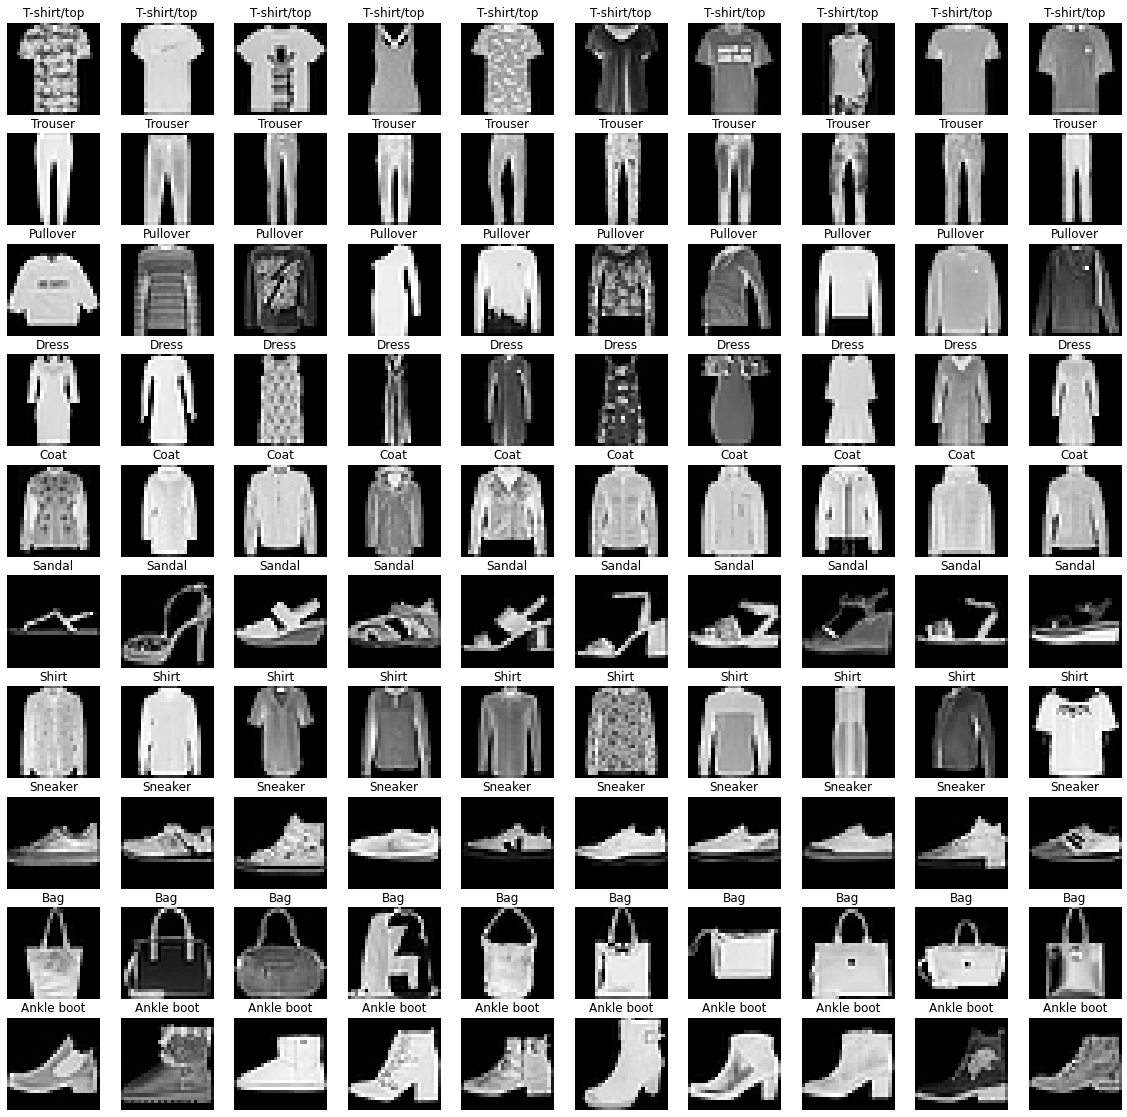

In [10]:
# Defining class name
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Creating a dictionary to group samples by class
class_samples = {i: [] for i in range(10)}

# Iterating through the data and group samples by class
for index, row in data.iterrows():
    label = row["label"]
    image_data = row.drop("label").values
    class_samples[label].append(image_data)

fig, axes = plt.subplots(10, 10, figsize = (20, 20))

# Visualing 10 samples for each class
for class_label in range(10):
    for i, ax, in enumerate(axes[class_label]):
        ax.imshow(class_samples[class_label][i].reshape(28, 28), cmap="gray")
        ax.set_title(class_names[class_label])
        ax.axis("off")
plt.show()

## Model Development

In [11]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [12]:
X = data.drop("label", axis=1).values
y = data["label"].values

# Reshaping the data to (batch_size, height, width)
X = X.reshape(-1, 28, 28, 1)

# Splitting data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the CNN model
model = tf.keras.Sequential([
    keras.layers.Reshape(target_shape=(28, 28, 1), input_shape=(28, 28)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val))

Epoch 1/3
1500/1500 [==============================] - 12s 8ms/step - loss: 1.2548 - accuracy: 0.8270 - val_loss: 0.3459 - val_accuracy: 0.8725
Epoch 2/3
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3241 - accuracy: 0.8806 - val_loss: 0.3228 - val_accuracy: 0.8844
Epoch 3/3
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2852 - accuracy: 0.8961 - val_loss: 0.3085 - val_accuracy: 0.8910


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dropout (Dropout)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                        

### Saving Model

In [ ]:
model.save("Model/model.keras")

## Human-in-the-Loop
We can use Active Learning (Active learning is a machine learning approach in which the model actively asks a human expert to identify certain data points. Prioritizing ambiguous or instructive instances helps increase the accuracy of the model when they are labeled. This method is useful when there is a lack of labeled data since it maximizes human input and speeds up learning by concentrating on the most useful data). As active learning effectively targets human involvement to the most ambiguous model predictions, therefore decreasing the labor-intensive manual labeling process and guaranteeing the application of human knowledge where it counts most. Because it is affordable, scalable, and allows for an ongoing feedback loop for model development, Active Learning is a great option for optimizing model accuracy with the least amount of human labor.